#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/
* https://www.neurotec.uni-bremen.de/drupal/node/30

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [1]:
import torchvision.models as models

In [2]:
model = models.efficientnet_b1(
    weights=models.EfficientNet_B1_Weights.IMAGENET1K_V2
)

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
list(model.parameters())[0].requires_grad_(False)

Parameter containing:
tensor([[[[ 3.5637e-01, -3.9536e+00,  6.0697e-01],
          [ 3.4295e-01,  2.7644e+00,  4.3559e-01],
          [-1.8645e-01, -8.7859e-02, -3.2967e-01]],

         [[ 1.4457e-01, -6.9390e+00,  6.4530e-01],
          [ 1.0947e+00,  5.1789e+00,  1.1849e+00],
          [-4.2976e-01, -9.3647e-02, -7.8200e-01]],

         [[ 4.1802e-01, -2.3925e+00,  4.0734e-01],
          [ 1.5750e-01,  1.8682e+00,  1.6627e-01],
          [-1.8791e-01, -1.1416e-01, -3.1263e-01]]],


        [[[-5.4691e-01, -1.6249e-01, -7.9661e-01],
          [-3.8267e-01, -1.6604e-01, -3.9609e-01],
          [-6.3246e-01, -6.6785e-01,  2.8481e-01]],

         [[-4.5147e-01, -9.2430e-02, -8.2167e-01],
          [-1.4177e-01, -9.1066e-02, -4.7296e-01],
          [-6.2034e-01, -8.4214e-01,  6.1425e-01]],

         [[-3.6359e-01, -1.5130e-01, -3.7205e-01],
          [-2.8225e-01,  1.2457e-01, -9.4255e-02],
          [-3.7333e-01, -3.9186e-01,  2.8180e-01]]],


        [[[ 6.9262e-02,  1.6176e+00, -9.8926

In [5]:
list(model.named_parameters())

[('features.0.0.weight',
  Parameter containing:
  tensor([[[[ 3.5637e-01, -3.9536e+00,  6.0697e-01],
            [ 3.4295e-01,  2.7644e+00,  4.3559e-01],
            [-1.8645e-01, -8.7859e-02, -3.2967e-01]],
  
           [[ 1.4457e-01, -6.9390e+00,  6.4530e-01],
            [ 1.0947e+00,  5.1789e+00,  1.1849e+00],
            [-4.2976e-01, -9.3647e-02, -7.8200e-01]],
  
           [[ 4.1802e-01, -2.3925e+00,  4.0734e-01],
            [ 1.5750e-01,  1.8682e+00,  1.6627e-01],
            [-1.8791e-01, -1.1416e-01, -3.1263e-01]]],
  
  
          [[[-5.4691e-01, -1.6249e-01, -7.9661e-01],
            [-3.8267e-01, -1.6604e-01, -3.9609e-01],
            [-6.3246e-01, -6.6785e-01,  2.8481e-01]],
  
           [[-4.5147e-01, -9.2430e-02, -8.2167e-01],
            [-1.4177e-01, -9.1066e-02, -4.7296e-01],
            [-6.2034e-01, -8.4214e-01,  6.1425e-01]],
  
           [[-3.6359e-01, -1.5130e-01, -3.7205e-01],
            [-2.8225e-01,  1.2457e-01, -9.4255e-02],
            [-3.7333e-01, 

In [6]:
ts = models.EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()
ts

ImageClassification(
    crop_size=[240]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [7]:
import torch as th

images = th.randint(0, 255, size=(16, 3, 500, 500))
images.shape

torch.Size([16, 3, 500, 500])

In [8]:
ts(images).shape

torch.Size([16, 3, 240, 240])

In [7]:
import os
os.chdir('c:\\Users\\Danya\\Downloads')

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [X] Проверено на семинаре

In [1]:
import torchvision.models as models
import torchvision.transforms.v2 as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch as th
import torchmetrics as M
import time
import matplotlib.pyplot as plt

In [11]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
num_layers = sum(1 for _ in model.parameters())
num_layers

32

In [13]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
trainable_params

138357544

<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [X] Проверено на семинаре

In [2]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [15]:
train_transform = T.Compose([
    T.Resize((256, 256)), 
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])
transform_test = models.VGG16_Weights.IMAGENET1K_V1.transforms()

dataset = ImageFolder(root='./cat_breeds_4/cat_breeds_4')
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])

train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = transform_test

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [16]:
train_dataset[0][0].shape, test_dataset[0][0].shape

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]))

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [X] Проверено на семинаре

In [17]:
for param in model.parameters():
    param.requires_grad = False
    
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, 4)
model = model.to(device)

In [3]:
def train_model_with_metrics(model, criterion, optimizer, train_loader, test_loader, n_epochs=1000, print_every=100):
    epoch_losses = []
    accuracy_scores = []
    test_accuracies = []

    loss_metric = M.MeanMetric().to(device)  
    accuracy_metric = M.Accuracy(task='multiclass', num_classes=len(dataset.classes)).to(device)  

    for epoch in range(n_epochs + 1):
        loss_metric.reset()
        accuracy_metric.reset()

        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            loss_metric.update(loss)
            accuracy_metric.update(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        
        epoch_loss = loss_metric.compute().item()
        accuracy = accuracy_metric.compute().item()
        epoch_losses.append(epoch_loss)
        accuracy_scores.append(accuracy)

        model.eval()
        test_accuracy_metric = M.Accuracy(task='multiclass', num_classes=len(dataset.classes)).to(device)
        with th.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                test_accuracy_metric.update(y_pred, y_batch)
        test_accuracies.append(test_accuracy_metric.compute().item())

        if epoch % print_every == 0:
            print(f'Epoch [{epoch}/{n_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

    return epoch_losses, accuracy_scores, test_accuracies

In [19]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
trainable_params

16388

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

start_time = time.time()
epoch_losses, accuracy_scores, test_accuracies = train_model_with_metrics(model, criterion, optimizer, train_loader, test_loader, n_epochs=5, print_every=1)
end_time = time.time()
end_time - start_time

Epoch [0/5], Loss: 0.6728, Train Accuracy: 0.7284, Test Accuracy: 0.7550
Epoch [1/5], Loss: 0.5450, Train Accuracy: 0.7844, Test Accuracy: 0.7650
Epoch [2/5], Loss: 0.5157, Train Accuracy: 0.7987, Test Accuracy: 0.7613
Epoch [3/5], Loss: 0.4963, Train Accuracy: 0.7978, Test Accuracy: 0.7862
Epoch [4/5], Loss: 0.4690, Train Accuracy: 0.8116, Test Accuracy: 0.7763
Epoch [5/5], Loss: 0.4552, Train Accuracy: 0.8172, Test Accuracy: 0.7638


79.71799755096436

In [21]:
accuracy_scores[-1], test_accuracies[-1]

(0.817187488079071, 0.7637500166893005)

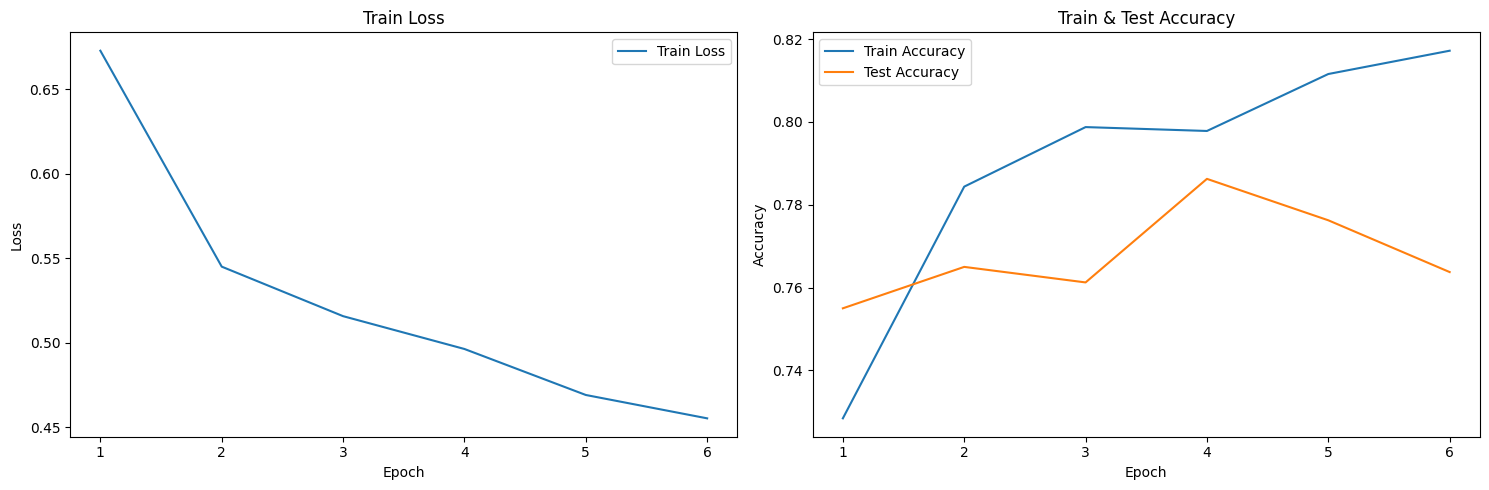

In [22]:
epochs = range(1, len(epoch_losses) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_scores, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [X] Проверено на семинаре

In [23]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

for param in model.features[:-1].parameters():
    param.requires_grad = False
    
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, 4)
model = model.to(device)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

start_time = time.time()
epoch_losses, accuracy_scores, test_accuracies = train_model_with_metrics(model, criterion, optimizer, train_loader, test_loader, n_epochs=5, print_every=1)
end_time = time.time()
end_time - start_time

Epoch [0/5], Loss: 1.0785, Train Accuracy: 0.6469, Test Accuracy: 0.7387
Epoch [1/5], Loss: 0.7020, Train Accuracy: 0.7941, Test Accuracy: 0.7700
Epoch [2/5], Loss: 0.6184, Train Accuracy: 0.8309, Test Accuracy: 0.6775
Epoch [3/5], Loss: 0.4605, Train Accuracy: 0.8728, Test Accuracy: 0.7613
Epoch [4/5], Loss: 0.5555, Train Accuracy: 0.8869, Test Accuracy: 0.7000
Epoch [5/5], Loss: 0.3577, Train Accuracy: 0.9212, Test Accuracy: 0.7325


81.086998462677

In [25]:
accuracy_scores[-1], test_accuracies[-1]

(0.9212499856948853, 0.7325000166893005)

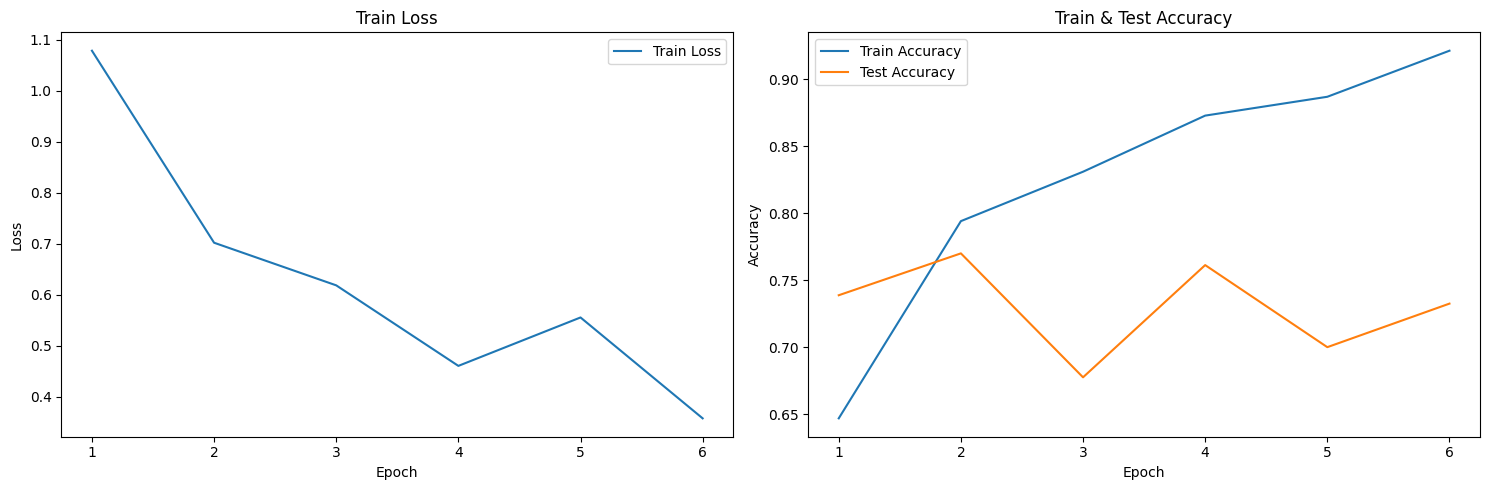

In [26]:
epochs = range(1, len(epoch_losses) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_scores, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [4]:
from torch.utils.data import ConcatDataset

In [5]:
augmentation = T.Compose([
        T.Resize((256, 256)), 
        T.CenterCrop(224),    
        T.RandomHorizontalFlip(p=0.1),
        T.RandomRotation(degrees=10),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

transform_test = models.VGG16_Weights.IMAGENET1K_V1.transforms()

dataset = ImageFolder(root='./cat_breeds_4/cat_breeds_4')
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])

test_dataset.dataset.transform = transform_test

augmented_datasets = [ImageFolder(root='./cat_breeds_4/cat_breeds_4', transform=augmentation)]
extended_train_dataset = ConcatDataset([train_dataset] + augmented_datasets)

train_loader = DataLoader(extended_train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [6]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

for param in model.features[:-1].parameters(): 
    param.requires_grad = False
    
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, 4)
model = model.to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

start_time = time.time()
epoch_losses, accuracy_scores, test_accuracies = train_model_with_metrics(model, criterion, optimizer, train_loader, test_loader, n_epochs=5, print_every=1)
end_time = time.time()
end_time - start_time

Epoch [0/5], Loss: 1.9236, Train Accuracy: 0.6265, Test Accuracy: 0.6975
Epoch [1/5], Loss: 1.5846, Train Accuracy: 0.6850, Test Accuracy: 0.7987
Epoch [2/5], Loss: 1.1940, Train Accuracy: 0.7310, Test Accuracy: 0.7675
Epoch [3/5], Loss: 1.0765, Train Accuracy: 0.7494, Test Accuracy: 0.8275
Epoch [4/5], Loss: 1.0878, Train Accuracy: 0.7732, Test Accuracy: 0.7937
Epoch [5/5], Loss: 1.1777, Train Accuracy: 0.7665, Test Accuracy: 0.8250


172.07391738891602

In [ ]:
accuracy_scores[-1], test_accuracies[-1]

(0.7665277719497681, 0.824999988079071)

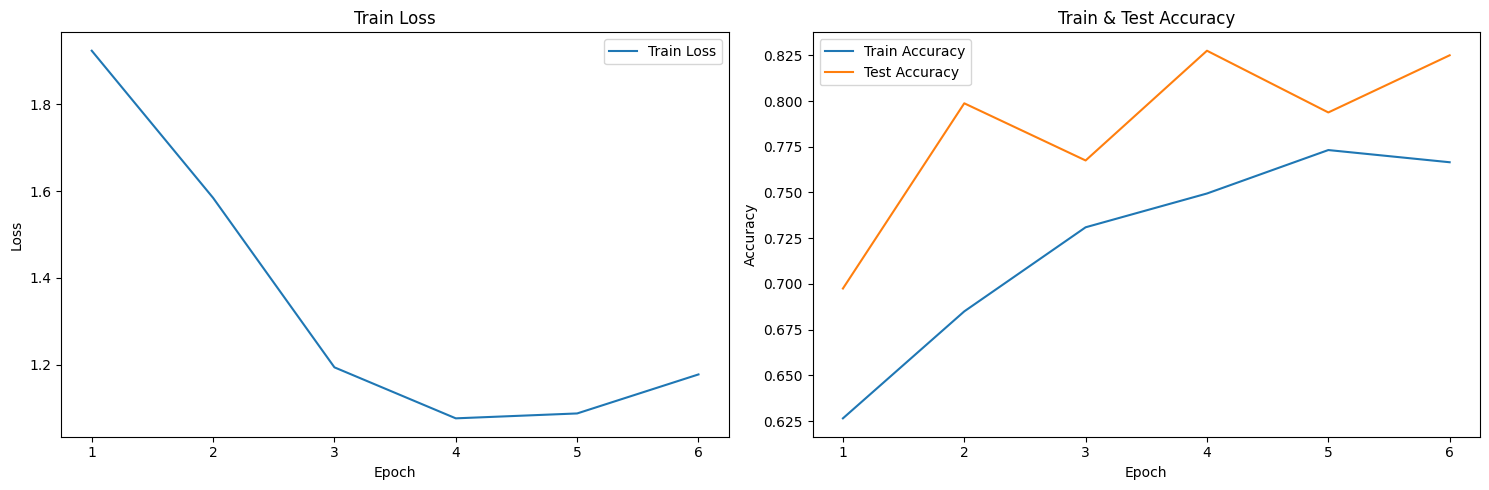

In [11]:
epochs = range(1, len(epoch_losses) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_scores, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()